# Analyzing Player Engagement in Minecraft: Predicting Played Hours Using Age and Experience

## Introduction
Games like Minecraft, renowned for their open-world design and creative possibilities, attract players with varying levels of engagement. Understanding what drives player engagement, measured in hours played, is essential for improving game design, crafting effective marketing strategies, and enhancing the overall player experience.

Two key factors that influence player engagement are **age** and **experience**. Age provides valuable insight into the demographic distribution of players, helping to identify how gaming habits differ across age groups. Experience, categorized into levels such as Beginner, Amateur, Regular, Veteran, and Pro, reflects a player's familiarity with the game. Both factors are crucial for analyzing player engagement patterns.

This project aims to answer the question: **"How does a player's experience level predict their total hours played?"** By addressing this question, we seek to understand the relationship between a player's familiarity with the game and their level of engagement, as measured by the total hours they spend playing. This analysis can provide valuable insights into player behavior and help inform strategies for improving engagement.

Two datasets were used to answer the question: the **players dataset** and the **sessions dataset**. These datasets were combined, wrangled, and transformed into a single dataset suitable for analysis.

---

## Players Dataset
The players' dataset provides demographic and player-specific information. It includes the following columns:
- **Experience**: The player’s familiarity level, categorized into levels such as Beginner, Amateur, Regular, Veteran, and Pro.
- **Subscribe**: A Boolean value indicating whether the player has a subscription.
- **HashedEmail**: A unique identifier for each player, used for data merging.
- **Played Hours**: The total hours the player has spent playing Minecraft.
- **Name**: The player’s name.
- **Gender**: The player’s gender.
- **Age**: The age of the player.
- **IndividualId & OrganizationName**: These columns were not used in the analysis as they contained missing data.

This dataset provided the core information on player demographics and total played hours, which were essential for modeling and understanding player engagement.

---

## Sessions Dataset
The sessions dataset captures information about individual sessions. Key columns include:
- **HashedEmail**: The player’s unique identifier, used to match with the players' dataset. 
- **start_time** and **end_time**: Unused columns.
- **original_start_time** and **original_end_time**: Used to calculate total played hours.

---

## Data Wrangling and Transformation
1. **Merging**: The datasets were merged using the `hashedEmail` column to associate session data with corresponding player demographics.
2. **Cleaning**: Columns with irrelevant or missing data (`individualId`, `organizationName`) were removed.
3. **Calculation and One-Hot Encoding**:
   - Total played hours were aggregated for each player using session data.
   - One-hot encoding was applied to the `experience` column to facilitate its use in machine learning models.

### Final Dataset
The final dataset included columns such as `subscribe`, `played_hours`, `age`, `total_played_hours`, `category`, `values`, and the one-hot encoded experience levels (e.g., `experiencePro`, `experienceVeteran`).

---

## Methods & Results

### Plots

#### **Figure 1: Distribution of Player Experience Levels by Played Hours**
**Boxplot Details**:
- **Title**: Distribution of Player Experience Levels by Played Hours
- **Box**: Shows the Interquartile Range (IQR), including the middle 50% of played hours for each group.
- **Horizontal Line in Box**: Indicates the median (central value) of played hours for each experience level.
- **Whiskers**: Extend to data points within 1.5 times the IQR.
- **Dots (Outliers)**: Represent players whose playtime is significantly above or below the main distribution.

**Insights**:
- **Beginners**: Exhibit the largest variability in played hours, with a higher median and wider IQR compared to other groups. 
- **Pro Players**: Show similar variability to beginners but with slightly lower median hours. 
- **Regular and Veteran Players**: Have a smaller spread and lower medians, indicating more consistent and shorter playtimes. 
- **Amateurs**: Display the lowest median and smallest variability, suggesting minimal engagement compared to other groups.

---

#### **Figure 2: Played Hours vs Age**
**Scatter Plot Details**:
- **Title**: Played Hours vs Age
- **X-Axis**: Age (in years)
- **Y-Axis**: Played Hours (in hours)
- **Dots**: Each dot represents an individual player, showing their age and corresponding total played hours.

**Insights**:
- **High Concentration at Lower Age Groups**: Most players are between the ages of 10 and 30, with younger players showing a wide range of engagement levels.
- **Decline in Engagement with Age**: Players above the age of 30 generally spend fewer hours playing Minecraft, often less than 0.5 hours.
- **Wide Variability Among Younger Players**: Ages 15 to 25 show the broadest range of played hours, including casual and highly engaged players.

---

#### **Figure 3: Played Hours vs Age Colored by Experience Level**
**Scatter Plot Details**:
- **Title**: Played Hours vs Age Colored by Experience Level
- **Axes**: Same as Figure 2.
- **Dots (Colored)**: Each dot represents an individual player, with different colors indicating their experience level.

**Insights**:
- **Age Range for Experience Levels**:
  - Beginners, Amateurs, and Veterans are widely distributed across ages, with younger players dominating.
  - Regular and Pro players are primarily clustered within younger age groups, typically under 20.
- **Decline in Engagement with Age**: Engagement (measured by played hours) declines across all experience levels as age increases.
- **Outliers in Higher Played Hours**: Most outliers with played hours above 2.0 belong to Beginners and Pros, reinforcing high variability within these two groups.

---

### Model Performance

#### **Training Data**
- **RMSPE**: 0.4758 (± 0.0435)
- Best model included both **age** and **experience** as predictors.

#### **Testing Data**
- **RMSE**: 0.5057
- **R-Squared**: 0.0675 (6.75% of the variability explained)
- **MAE**: 0.4131

---

## Discussion

### Insights
- Younger players (ages 10–30) are more engaged, with significant variability in playtime.
- Age and experience together improve predictions of played hours compared to using either variable alone.
- Outliers (high playtime values) were removed to improve model performance.

### Limitations
- Small dataset size limits generalizability.
- Survey-based data may include inaccuracies.

### Future Directions
- Investigate other predictors, such as in-game interactions or gameplay modes.
- Explore cultural or geographic factors affecting engagement.

---

## References
1. Timbers, Tiffany. *“Chapter 3 Cleaning and Wrangling Data | Data Science.”* [Datasciencebook.ca](https://datasciencebook.ca/wrangling.html#exercises-2), 21 Aug. 2024.
2. Timbers, Tiffany. *“Chapter 7 Regression I: K-Nearest Neighbors | Data Science.”* [Datasciencebook.ca](https://datasciencebook.ca/regression1.html#strengths-and-limitations-of-k-nn-regression), 21 Aug. 2024.


In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
library(infer)
library(cowplot)
options(repr.matrix.max.rows = 6)

In [14]:
set.seed(4)

url1 <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
url2 <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
download.file(url1, destfile = "data/players.csv")
players <- read_csv("data/players.csv")
download.file(url2, destfile = "data/sessions.csv")
sessions <- read_csv("data/sessions.csv")
players
sessions

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [4]:
# Data Wrangling
# Sessions dataset
# Convert `start_time` and `end_time` to readable datetime
sessions_data <- sessions |>
mutate (start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")) |>
mutate (end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M")) |>
# Compute the session length
mutate (session_length = (end_time - start_time)/60) |>
# Convert session length to numeric value in hours
mutate(session_length = as.numeric(session_length)) |>
select(hashedEmail, session_length)

# Players dataset
# Only use columns with values
players_data <- players |>
    select(experience:age)
sessions_data
players_data


hashedEmail,session_length
<chr>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,0.2000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,0.2166667
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,0.3833333
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,0.3500000
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,0.1166667
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,0.3166667


experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91


In [5]:
# Compute the session couts for each player
session_counts <- sessions_data |>
    group_by(hashedEmail) |>
    summarize(count = n())

# Compute the total session lengths for each player
session_lengths <- sessions_data |> 
group_by(hashedEmail)|>
summarize(total_played_hours = sum(session_length))

# Join the session counts and to players_data based on hashedEmail
set3 <- players_data |>
    left_join(session_counts, by = "hashedEmail")

# Join the total_played_hours and to players_data based on hashedEmail
set3 <- set3 |>
left_join(session_lengths, by = "hashedEmail")

set3

experience,subscribe,hashedEmail,played_hours,name,gender,age,count,total_played_hours
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,33.65000000
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,4.25000000
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,0.08333333
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,1,0.08333333
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,6,2.98333333
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,1,0.25000000


Warning message:
“Removed 72 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 72 rows containing missing values or values outside the scale range
(`geom_point()`).”


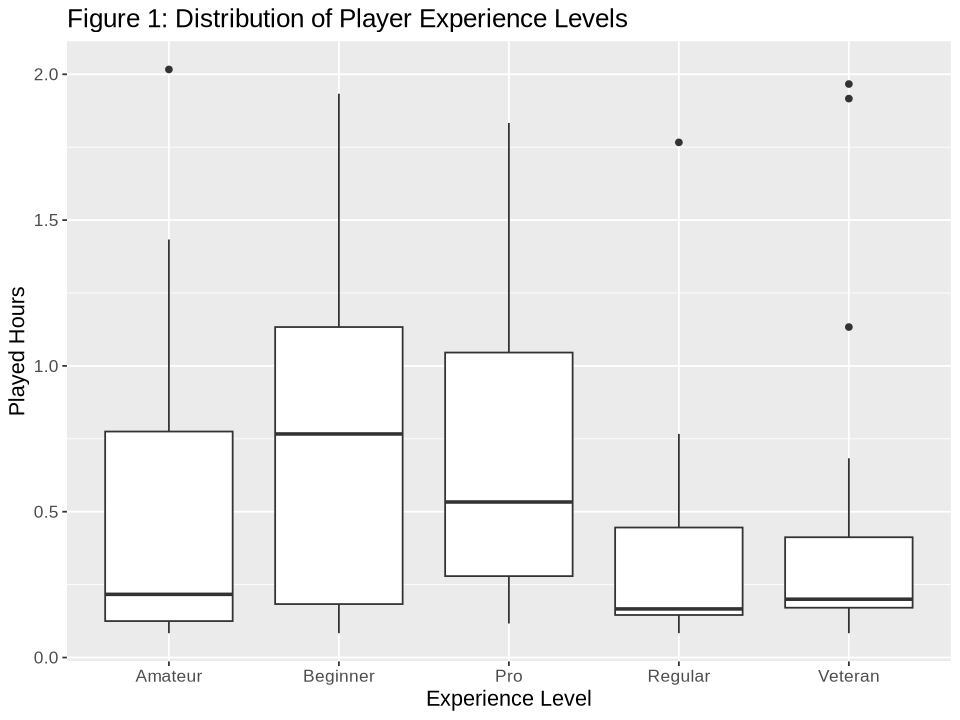

Warning message:
“Removed 72 rows containing missing values or values outside the scale range
(`geom_point()`).”


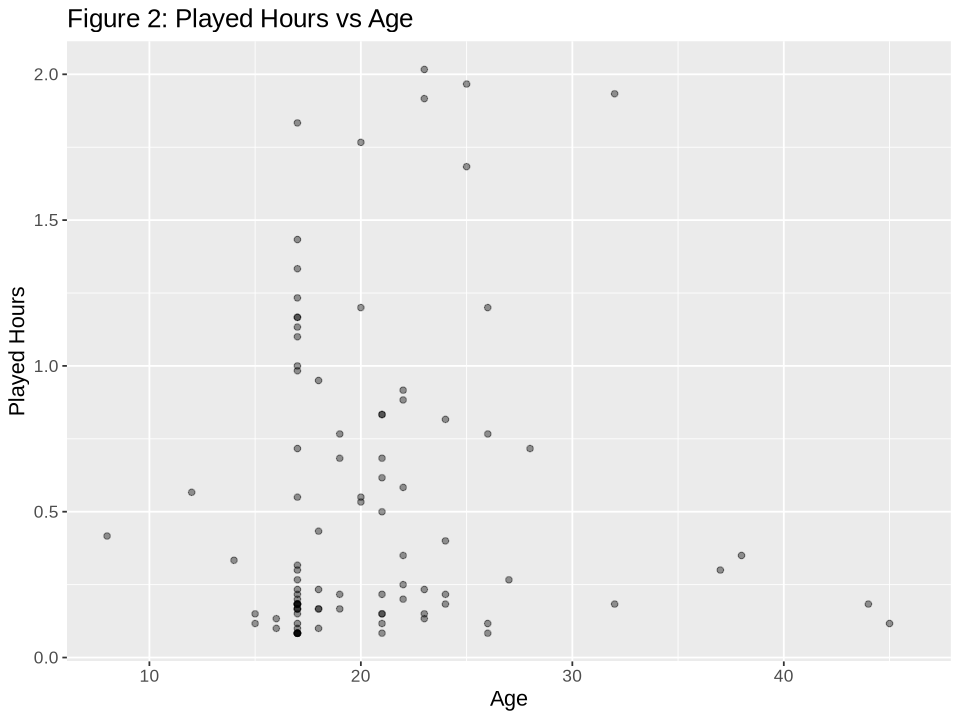

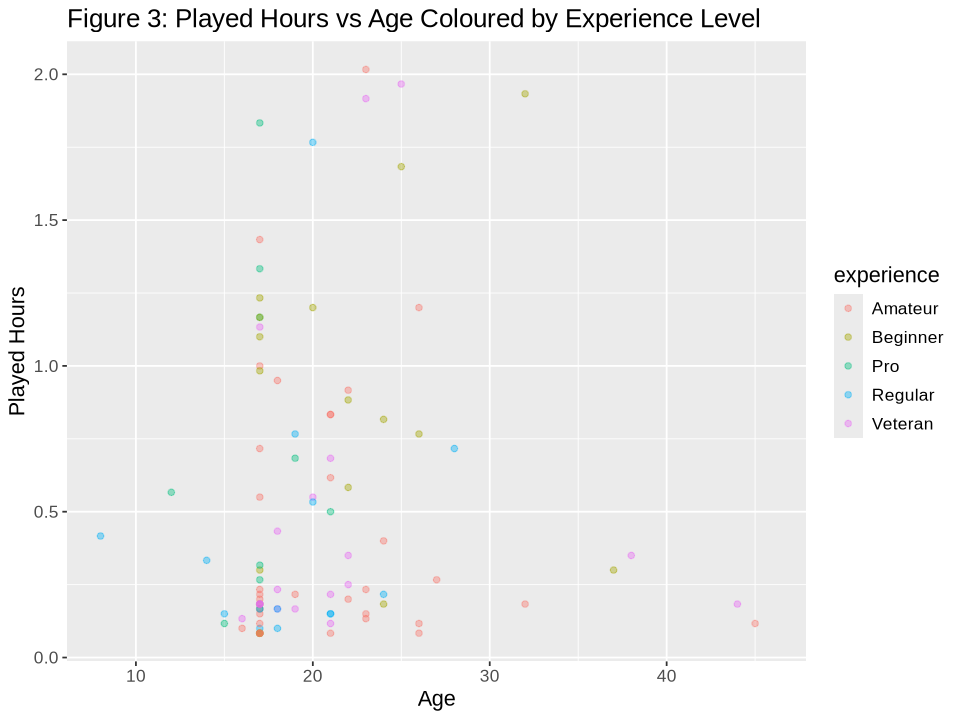

In [15]:
#initial visualizations

options(repr.plot.width = 8, repr.plot.height = 6)

set4 <- set3|>
    filter(played_hours < 2)
plot3 <- ggplot(set4, aes(x = experience, y = total_played_hours)) +
  geom_boxplot() +
  labs(
    title = "Figure 1: Distribution of Player Experience Levels",
    x = "Experience Level",
    y = "Played Hours") +
theme(text = element_text(size = 13))
  

set5 <- set3|>
    filter(age < 50 & played_hours < 2) 
# Played hours vs. Age
plot4 <- ggplot(set5, aes(x = age, y = total_played_hours)) +
  geom_point(alpha=0.4) +
  labs(
    title = "Figure 2: Played Hours vs Age",
    x = "Age",
    y = "Played Hours") +
theme(text = element_text(size = 13))

plot5 <- set5 |>
ggplot(aes(x = age, y = total_played_hours)) +
geom_point(aes(color = experience), alpha = 0.4) +
xlab("Age") +
ylab("Played Hours") +
ggtitle("Figure 3: Played Hours vs Age Coloured by Experience Level") +
theme(text = element_text(size = 13))


plot3
plot4
plot5

In [17]:
#knn regression set up
#one-hot encoding applied to column "experience" in preparation for knn-regression model
library(caret)

training1_one_hot_encoding <- data.frame(experience = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))

dmy <- dummyVars("~ experience", data = training1_one_hot_encoding)

trsf <- data.frame(predict(dmy, newdata = training1_one_hot_encoding))

training1_combined <- cbind(training1_one_hot_encoding, trsf)

print(training1_combined)

df <- c("Beginner", "Amateur", "Regular", "Veteran", "Pro")

encoded_factor <- set3 |>
    mutate(experience = as.factor(experience))

encoded_df <- encoded_factor |>
    tidyr::pivot_longer(
        cols = experience,
        names_to = "category",
        values_to = "value"
    ) |>
    group_by(category) |>
    mutate(value = factor(value, levels = unique(value))) |>
    ungroup()
    # select(value)

combined_df <- encoded_df |>
    left_join(training1_combined, by = c("value" = "experience"))

combined_df
# print(encoded_df)
# # 2. One-hot encoding using dummyVars

  experience experienceAmateur experienceBeginner experiencePro
1   Beginner                 0                  1             0
2    Amateur                 1                  0             0
3    Regular                 0                  0             0
4    Veteran                 0                  0             0
5        Pro                 0                  0             1
  experienceRegular experienceVeteran
1                 0                 0
2                 0                 0
3                 1                 0
4                 0                 1
5                 0                 0


subscribe,hashedEmail,played_hours,name,gender,age,count,total_played_hours,category,value,experienceAmateur,experienceBeginner,experiencePro,experienceRegular,experienceVeteran
<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,33.65000000,experience,Pro,0,0,1,0,0
TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,4.25000000,experience,Veteran,0,0,0,0,1
FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,0.08333333,experience,Veteran,0,0,0,0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,1,0.08333333,experience,Amateur,1,0,0,0,0
FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,6,2.98333333,experience,Amateur,1,0,0,0,0
TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,1,0.25000000,experience,Pro,0,0,1,0,0


In [18]:
# Get rid of outliers and split the data
set.seed(4)
combined_df_no_outliers <- combined_df |>
filter(total_played_hours < 2) # From the boxplot, any played_hours larger than ~2 hours are clearly outliers.
split1 <- initial_split(combined_df_no_outliers, prop = 0.70, strata = total_played_hours) # 30:70 split of training:testing
training1 <- training(split1)
testing1 <- testing(split1)

combined_df_no_outliers

subscribe,hashedEmail,played_hours,name,gender,age,count,total_played_hours,category,value,experienceAmateur,experienceBeginner,experiencePro,experienceRegular,experienceVeteran
<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,0.08333333,experience,Veteran,0,0,0,0,1
TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1,0.83333333,experience,Amateur,1,0,0,0,0
TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1,0.15000000,experience,Regular,0,0,0,1,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,1,0.35000000,experience,Veteran,0,0,0,0,1
FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,1,0.08333333,experience,Amateur,1,0,0,0,0
TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,1,0.25000000,experience,Pro,0,0,1,0,0


In [20]:
set.seed(4)
#knn-regression model tuning for predictors "age" and "experience"
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_recipe <- recipe(total_played_hours ~ age + experienceAmateur + experienceBeginner + experiencePro + experienceRegular + experienceVeteran, data = training1) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_vfold <- vfold_cv(training1, v = 5, strata = total_played_hours)

knn_wkfw <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) 

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- knn_wkfw |>
    tune_grid(resamples = knn_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

knn_results_min <- knn_results |>
    filter(mean == min(mean))

knn_results_min

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
8,rmse,standard,0.4758002,5,0.04350175,Preprocessor1_Model08


In [22]:
set.seed(4)
#knn-regression model tuning for predictor "experience"
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_recipe <- recipe(total_played_hours ~ experienceAmateur + experienceBeginner + experiencePro + experienceRegular + experienceVeteran, data = training1) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_vfold <- vfold_cv(training1, v = 5, strata = total_played_hours)

knn_wkfw <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) 

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- knn_wkfw |>
    tune_grid(resamples = knn_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

knn_results_min <- knn_results |>
    filter(mean == min(mean))

knn_results_min

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
8,rmse,standard,0.4990777,5,0.04735433,Preprocessor1_Model08


In [23]:
set.seed(4)
#knn-regression model tuning for predictor "age"
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_recipe <- recipe(total_played_hours ~ age, data = training1) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_vfold <- vfold_cv(training1, v = 5, strata = total_played_hours)

knn_wkfw <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) 

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- knn_wkfw |>
    tune_grid(resamples = knn_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

knn_results_min <- knn_results |>
    filter(mean == min(mean))

knn_results_min

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
10,rmse,standard,0.5101562,5,0.04836772,Preprocessor1_Model10


In [13]:
#checking testing data with 2 predictors
set.seed(4)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_recipe <- recipe(total_played_hours ~ age + experienceAmateur + experienceBeginner + experiencePro + experienceRegular + experienceVeteran, data = training1) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_wkfw <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    fit(data = training1)

knn_summary <- knn_wkfw |>
    predict(testing1) |>
    bind_cols(testing1) |>
    metrics(truth = total_played_hours, estimate = .pred)

knn_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.50567086
rsq,standard,0.06751877
mae,standard,0.41308244
